In [1]:
source('../src/load_data.r')
source('../src/multiplot.r')

In [2]:
dim(housing_df)

[1] 1451   80

In [3]:
head(housing_df)

MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,⋯,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,65,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,2,2008,WD,Normal,208500
20,RL,80,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,⋯,0,without,without,without,0,5,2007,WD,Normal,181500
60,RL,68,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,⋯,0,without,without,without,0,9,2008,WD,Normal,223500
70,RL,60,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,⋯,0,without,without,without,0,2,2006,WD,Abnorml,140000
60,RL,84,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,⋯,0,without,without,without,0,12,2008,WD,Normal,250000
50,RL,85,14115,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,⋯,0,without,MnPrv,Shed,700,10,2009,WD,Normal,143000


In [4]:
count_empty_total()

In [5]:
numeric_features = colnames(Filter(is.numeric, housing_df))
numeric_features

[1] "LotFrontage"   "LotArea"       "YearBuilt"     "YearRemodAdd" 
 [5] "MasVnrArea"    "BsmtFinSF1"    "BsmtFinSF2"    "BsmtUnfSF"    
 [9] "TotalBsmtSF"   "FirstFlrSF"    "SecondFlrSF"   "LowQualFinSF" 
[13] "GrLivArea"     "GarageYrBlt"   "GarageArea"    "WoodDeckSF"   
[17] "OpenPorchSF"   "EnclosedPorch" "ThreeSsnPorch" "ScreenPorch"  
[21] "PoolArea"      "MiscVal"       "YrSold"        "SalePrice"

In [6]:
numeric_df = Filter(is.numeric, housing_df)
numeric_df$SalePrice <- NULL
numeric_features = colnames(numeric_df)

In [7]:
attach(numeric_df)

In [8]:
install.packages('rpart')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [9]:
library(caret)
library(rpart)

Loading required package: lattice


## Redundancy

In [10]:
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:10) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}

In [11]:
calculate_r_2_for_feature(numeric_df,'LotFrontage')

[1] 0.3613514

In [12]:
for (feature in numeric_features){
    print(paste(feature, mean_r2_for_feature(numeric_df, feature)))
}

[1] "LotFrontage 0.267793776824801"
[1] "LotArea -0.49119193919786"
[1] "YearBuilt 0.718400044165383"
[1] "YearRemodAdd 0.437970895142651"
[1] "MasVnrArea 0.170102278669495"
[1] "BsmtFinSF1 0.767909400962158"
[1] "BsmtFinSF2 0.462190912219559"
[1] "BsmtUnfSF 0.77849002532384"
[1] "TotalBsmtSF 0.724489702418583"
[1] "FirstFlrSF 0.746006310610877"
[1] "SecondFlrSF 0.873423919041371"
[1] "LowQualFinSF -0.111386557052804"
[1] "GrLivArea 0.856114539340937"
[1] "GarageYrBlt 0.775891222993169"
[1] "GarageArea 0.593918566514851"
[1] "WoodDeckSF 0.0129264535698725"
[1] "OpenPorchSF 0.0279921295088335"
[1] "EnclosedPorch 0.0863863995713953"
[1] "ThreeSsnPorch -0.456406168021926"
[1] "ScreenPorch -0.200855423175234"
[1] "PoolArea -Inf"
[1] "MiscVal -1.1535187614203"
[1] "YrSold 0.0476947217328287"


## Correlation

In [13]:
options(digits=3)
cor(numeric_df)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,FirstFlrSF,⋯,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThreeSsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold
LotFrontage,1.00000,0.30692,0.11731,0.08231,0.17977,0.21720,0.04369,0.11997,0.3632,0.41515,⋯,0.06376,0.3234,0.07603,0.13526,0.01014,0.062581,0.0380,0.18135,0.001244,0.00767
LotArea,0.30692,1.00000,0.01571,0.01519,0.10414,0.21308,0.11167,-0.00425,0.2585,0.29598,⋯,-0.02403,0.1808,0.17317,0.08628,-0.02311,0.020568,0.0435,0.07789,0.038221,-0.01297
YearBuilt,0.11731,0.01571,1.00000,0.59032,0.31634,0.25021,-0.04761,0.15022,0.3943,0.28565,⋯,0.77906,0.4789,0.22696,0.18576,-0.38675,0.032145,-0.0490,0.00537,-0.033994,-0.01456
YearRemodAdd,0.08231,0.01519,0.59032,1.00000,0.18014,0.12842,-0.06649,0.18222,0.2930,0.24346,⋯,0.61582,0.3711,0.20751,0.22414,-0.19219,0.046012,-0.0375,0.00620,-0.009866,0.03526
MasVnrArea,0.17977,0.10414,0.31634,0.18014,1.00000,0.26447,-0.07244,0.11430,0.3637,0.34425,⋯,0.25072,0.3730,0.15975,0.12546,-0.11036,0.018752,0.0614,0.01170,-0.029854,-0.00815
BsmtFinSF1,0.21720,0.21308,0.25021,0.12842,0.26447,1.00000,-0.04950,-0.49660,0.5201,0.44284,⋯,0.14988,0.2954,0.20545,0.10728,-0.10589,0.026926,0.0631,0.14136,0.003852,0.01697
BsmtFinSF2,0.04369,0.11167,-0.04761,-0.06649,-0.07244,-0.04950,1.00000,-0.20981,0.1061,0.09865,⋯,-0.08571,-0.0176,0.06768,0.00416,0.03668,-0.030211,0.0884,0.04160,0.004784,0.03188
BsmtUnfSF,0.11997,-0.00425,0.15022,0.18222,0.11430,-0.49660,-0.20981,1.00000,0.4159,0.31805,⋯,0.18734,0.1839,-0.00418,0.13005,-0.00379,0.020825,-0.0126,-0.03517,-0.023884,-0.04034
TotalBsmtSF,0.36315,0.25854,0.39428,0.29299,0.36367,0.52010,0.10609,0.41590,1.0000,0.81811,⋯,0.31336,0.4863,0.23442,0.24441,-0.10038,0.037867,0.0856,0.12685,-0.018345,-0.01131
FirstFlrSF,0.41515,0.29598,0.28565,0.24346,0.34425,0.44284,0.09865,0.31805,0.8181,1.00000,⋯,0.22940,0.4908,0.23882,0.21023,-0.07290,0.056838,0.0902,0.13267,-0.021003,-0.00897


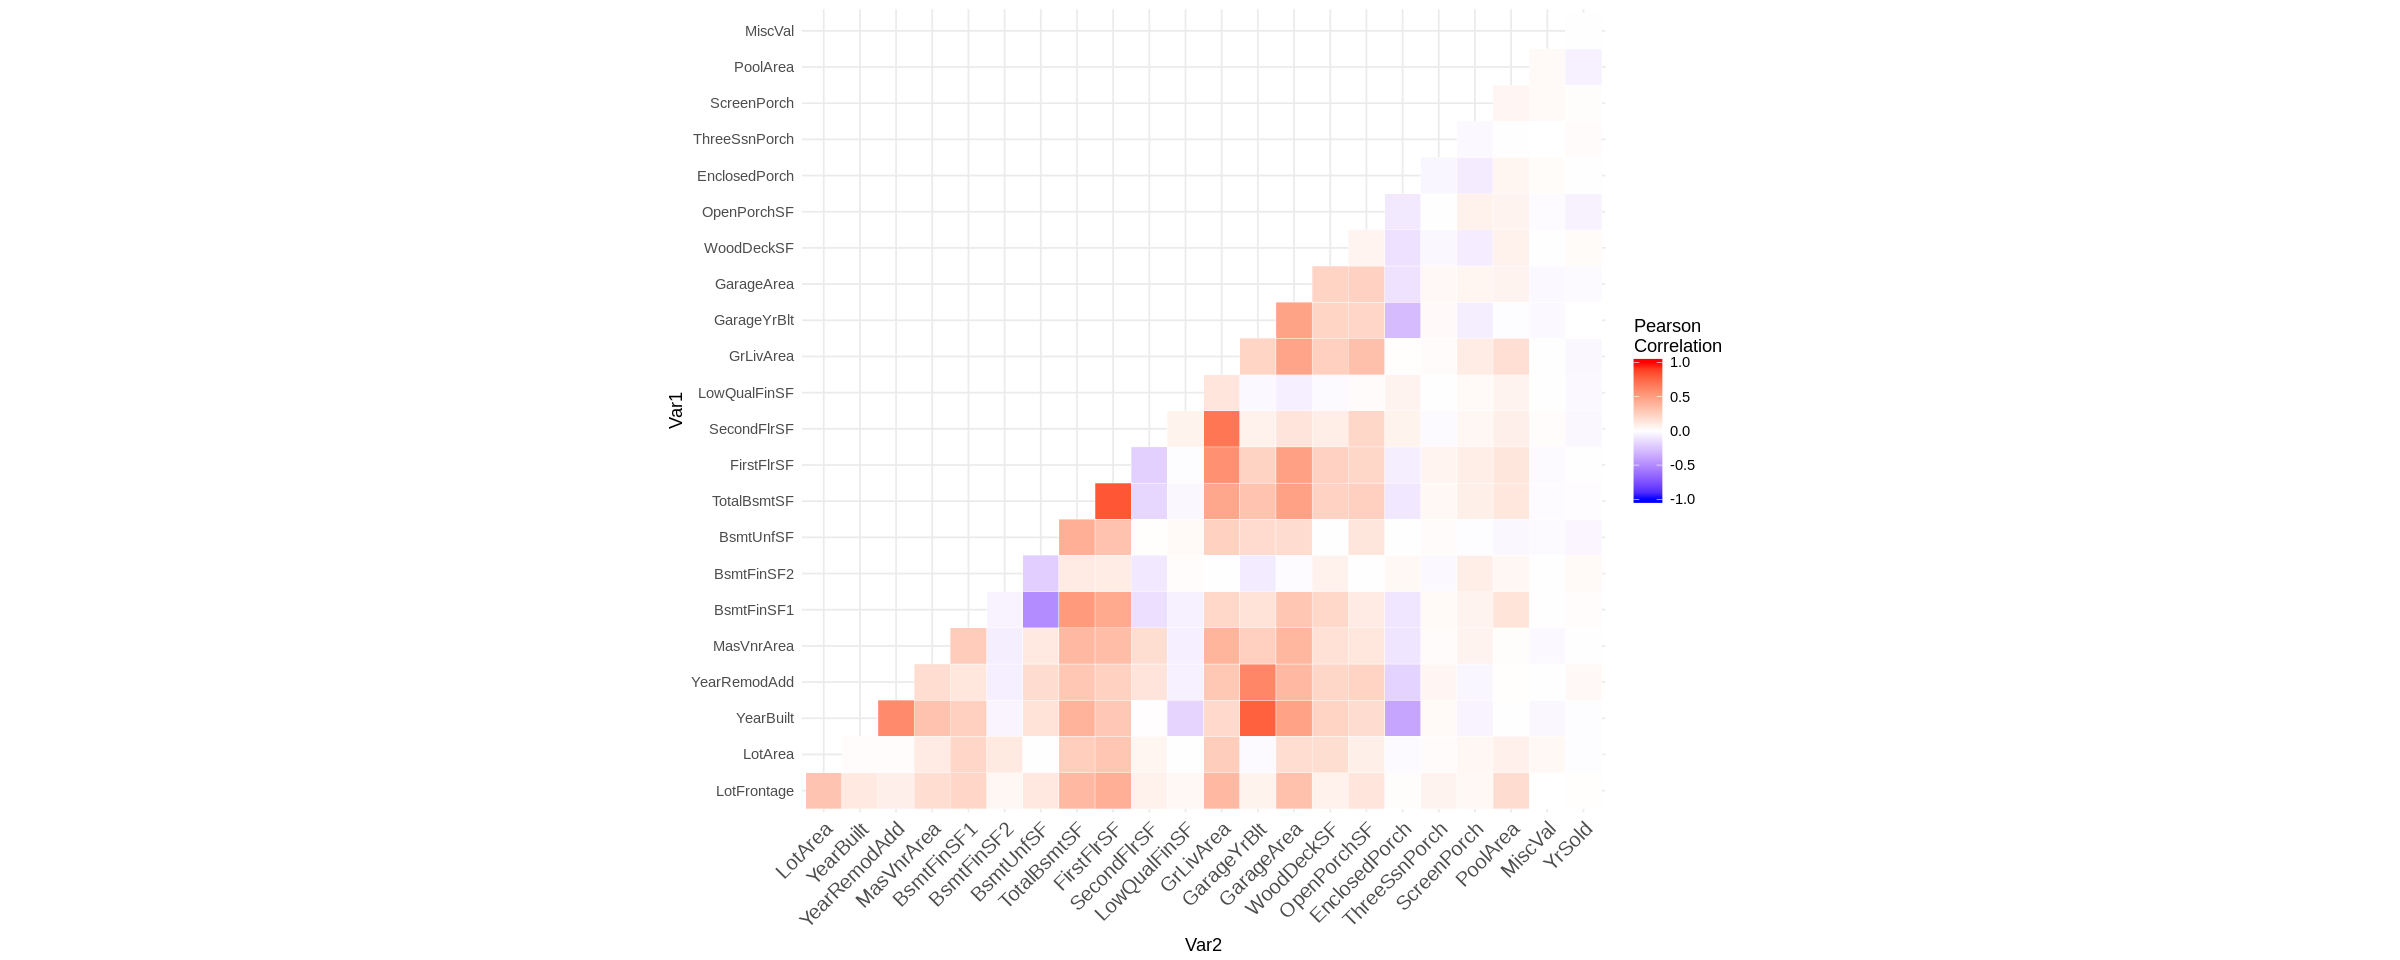

In [14]:
library(reshape2)
cormat = cor(numeric_df)

cormat[lower.tri(cormat)] <- NA
diag(cormat) <- NA

melted_cormat <- melt(cormat, na.rm = T)

library(ggplot2)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()